# Analysis of sold new cars in Estonia 2020

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [1]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mnt_sum import get_summary, COLUMNS, PRIVATE_CUSTOMER, COLUMN_SHORT_NAME, COLUMN_CUSTOMER, COLUMN_CITY
df_o = get_summary('data/2020')
df_o.describe()

,Esm reg aasta,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Arv,Registrimass
count,14079.0,14079.000000,14079.000000,13998.000000,12887.000000,14079.000000,14079.0,14079.000000,14079.000000,5965.000000
mean,2020.0,1696.422899,115.350131,128.906987,2086.431055,1613.700831,2.0,5.154770,1.369700,2064.717351
std,0.0,603.140713,48.301598,35.820663,388.219054,333.044120,0.0,0.689445,2.381272,367.083679
min,2020.0,0.000000,25.300000,0.000000,1240.000000,927.000000,2.0,2.000000,1.000000,1260.000000
25%,2020.0,1373.000000,88.000000,109.000000,1845.000000,1407.000000,2.0,5.000000,1.000000,1837.000000
50%,2020.0,1580.000000,110.000000,127.000000,2000.000000,1541.000000,2.0,5.000000,1.000000,1990.000000
75%,2020.0,1984.000000,130.000000,144.000000,2206.000000,1720.000000,2.0,5.000000,1.000000,2189.000000
max,2020.0,6749.000000,585.000000,473.000000,5600.000000,4985.000000,2.0,9.000000,113.000000,5500.000000


In [3]:
df_o.head()

,Kategooria,Mark,Mudel,Keretüüp,Esm reg aasta,Mootori tüüp,Mootori maht,Mootori võimsus,CO2,Täismass,...,Telgi kokku,Istekohti,Maakond,Linn,Tüüp (isik),Arv,Registrimass,Värv,name,short name
74,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2020,BENSIIN_KATALYSAATOR,999,85.0,117,1680,...,2,5,Harju maakond,Tallinn,JURIIDILINE,1,<NA>,<NA>,AUDI A1 SPORTBACK,AUDI A1
75,M1,AUDI,A4 AVANT,UNIVERSAAL,2020,DIISEL,1968,140.0,139,2230,...,2,5,Harju maakond,Tallinn,JURIIDILINE,1,<NA>,<NA>,AUDI A4 AVANT,AUDI A4
76,M1,AUDI,A4 LIMOUSINE,SEDAAN,2020,BENSIIN_HYBRIID,1984,110.0,137,2035,...,2,5,Jõgeva maakond,Määramata,FÜÜSILINE,1,<NA>,<NA>,AUDI A4 LIMOUSINE,AUDI A4
77,M1,AUDI,A5 SPORTBACK,LUUKPÄRA,2020,BENSIIN_HYBRIID,1984,140.0,135,2055,...,2,5,Harju maakond,Tallinn,FÜÜSILINE,1,<NA>,<NA>,AUDI A5 SPORTBACK,AUDI A5
78,M1,AUDI,A5 SPORTBACK,LUUKPÄRA,2020,DIISEL,1968,110.0,118,2120,...,2,5,Harju maakond,Tallinn,JURIIDILINE,1,<NA>,<NA>,AUDI A5 SPORTBACK,AUDI A5


In [4]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv
74,AUDI,A1 SPORTBACK,AUDI A1,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,JURIIDILINE,1,<NA>
75,AUDI,A4 AVANT,AUDI A4,DIISEL,1968,140.0,Tallinn,JURIIDILINE,1,<NA>
76,AUDI,A4 LIMOUSINE,AUDI A4,BENSIIN_HYBRIID,1984,110.0,Määramata,FÜÜSILINE,1,<NA>
77,AUDI,A5 SPORTBACK,AUDI A5,BENSIIN_HYBRIID,1984,140.0,Tallinn,FÜÜSILINE,1,<NA>
78,AUDI,A5 SPORTBACK,AUDI A5,DIISEL,1968,110.0,Tallinn,JURIIDILINE,1,<NA>


## Add additional data

In [5]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df['SUV']].head(5)

/tmp/ipykernel_270185/968145016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp (isik),Arv,Värv,SUV
83,AUDI,E-TRON 55,AUDI E-TRON,ELEKTER,0,158.0,Tallinn,JURIIDILINE,1,<NA>,True
84,AUDI,Q2,AUDI Q2,BENSIIN_KATALYSAATOR,1498,110.0,Määramata,FÜÜSILINE,1,<NA>,True
85,AUDI,Q2,AUDI Q2,BENSIIN_KATALYSAATOR,1498,110.0,Tallinn,JURIIDILINE,1,<NA>,True
86,AUDI,Q3,AUDI Q3,BENSIIN_KATALYSAATOR,1498,110.0,Määramata,JURIIDILINE,1,<NA>,True
87,AUDI,Q3,AUDI Q3,BENSIIN_KATALYSAATOR,1984,140.0,Pärnu,JURIIDILINE,1,<NA>,True


# Total sold cars

In [6]:
df['Arv'].sum()

19284

# Popular fuels

                        Arv
Mootori tüüp               
BENSIIN_KATALYSAATOR  10334
DIISEL                 4881
BENSIIN_HYBRIID        2566
CNG                     664
ELEKTER                 344
BENSIIN                 259
DIISEL_HYBRIID          236


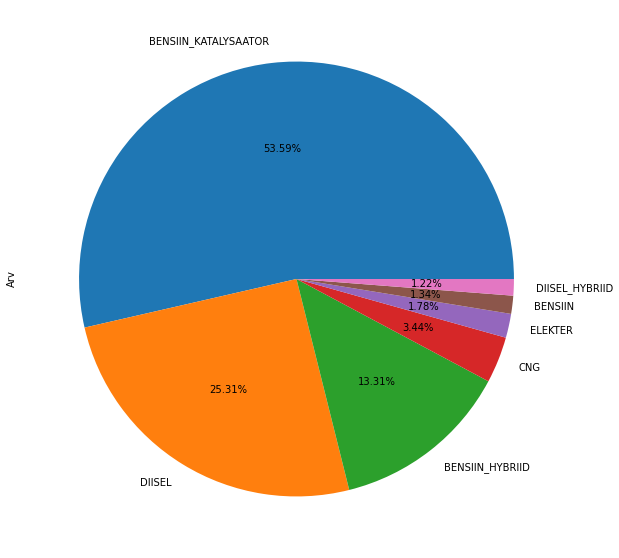

In [7]:
def show_pie(dataframe, groupby, index = None):
    plt.figure(figsize=(10, 10))
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Popular colors

               Arv
Värv              
HALL          2053
MUST          1245
VALGE         1218
SININE         900
PUNANE         632
TUMEHALL       404
PRUUN          280
HÕBEDANE       249
BEEŽ           160
ROHELINE       127
TUMESININE      84
ORANŽ           81
HOBEDANE        61
TUMEPUNANE      55
BEEZ            55
KOLLANE         50
TUMEPRUUN       35
HELESININE      33
HELEHALL        28
ORANZ           22
KULDNE          20
HELEBEEŽ        13
HELEPRUUN       11
LILLA           10
TUMEROHELINE     5
HELEROHELINE     4
HELEBEEZ         1
MÄÄRAMATA        1


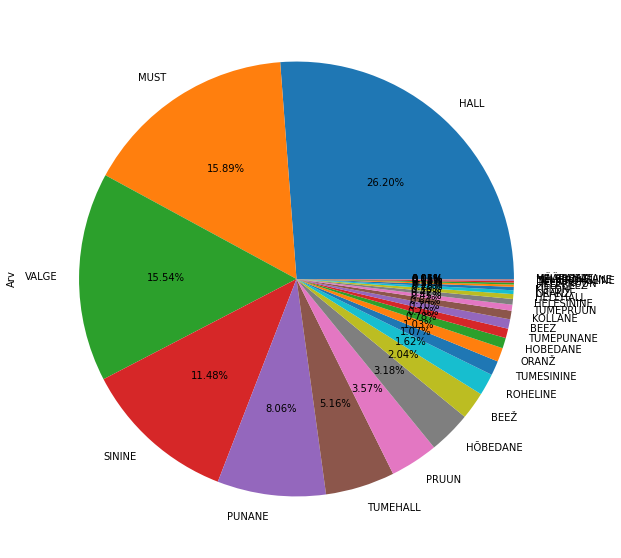

In [8]:
show_pie(df, 'Värv')

# Engine capacities

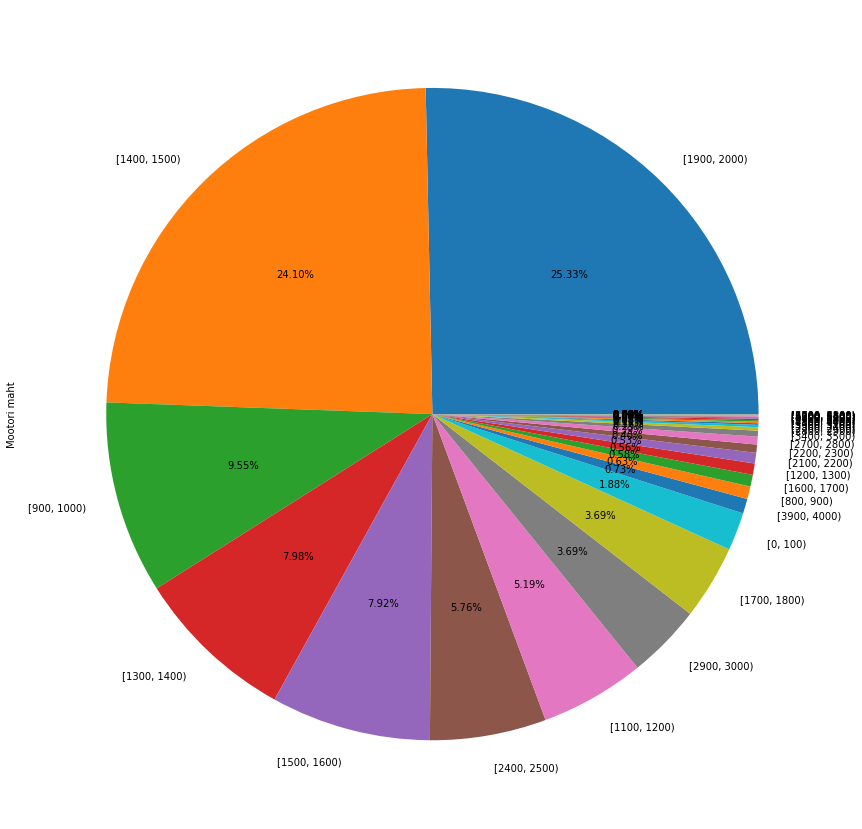

In [9]:
plt.figure(figsize=(15, 15))

bins = range(df['Mootori maht'].min(), df['Mootori maht'].max() + 100, 100)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
pass

# Top 10 popular manufacturers

          Mark   Arv
1       TOYOTA  3362
2        SKODA  2884
3      RENAULT  2021
4          KIA  1259
5   VOLKSWAGEN  1197
6      PEUGEOT  1173
7      CITROEN  1161
8        DACIA   706
9      HYUNDAI   621
10       HONDA   563


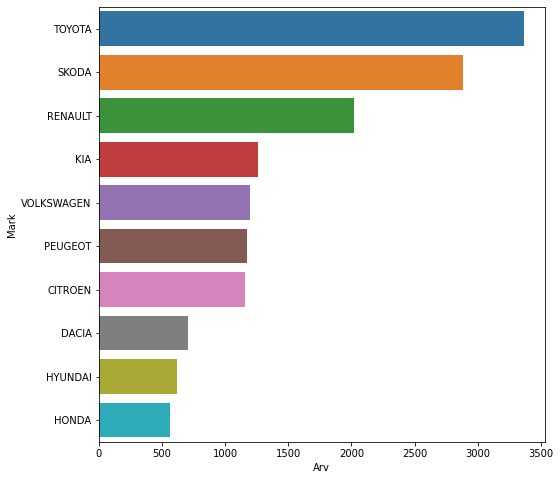

In [10]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

          short name   Arv
1        TOYOTA RAV4  1400
2      SKODA OCTAVIA  1054
3     TOYOTA COROLLA   977
4       RENAULT CLIO   956
5   CITROEN BERLINGO   601
6       SKODA KODIAQ   536
7           KIA CEED   403
8       KIA SPORTAGE   399
9       SKODA SUPERB   336
10      DACIA DUSTER   327


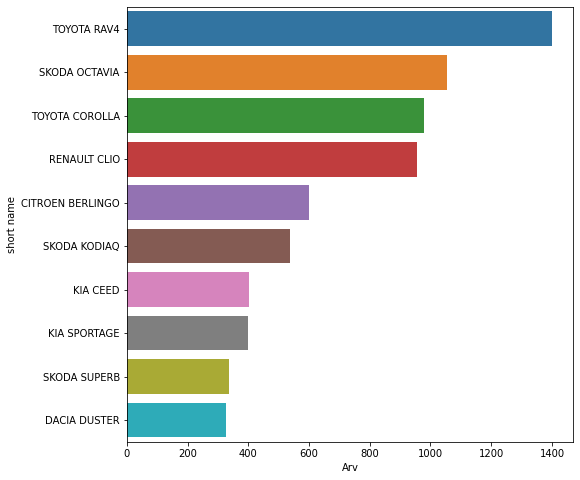

In [11]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

             short name  Arv
1      CITROEN BERLINGO  506
2         SKODA OCTAVIA  392
3          SKODA KODIAQ  266
4          PEUGEOT 3008  250
5          PEUGEOT 2008  182
6               AUDI Q3  172
7          KIA SPORTAGE  166
8          PEUGEOT 5008  153
9   CITROEN C5 AIRCROSS  125
10         SKODA SUPERB  123


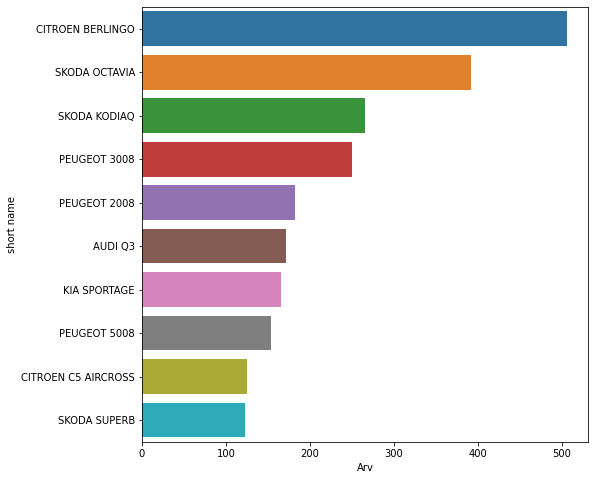

In [12]:
df_diesel = df[df['Mootori tüüp'] == 'DIISEL']

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

        short name  Arv
1     RENAULT CLIO  941
2      TOYOTA RAV4  864
3   TOYOTA COROLLA  486
4         KIA CEED  320
5    SKODA OCTAVIA  296
6     SKODA KODIAQ  270
7    DACIA SANDERO  247
8      SKODA KAROQ  245
9     DACIA DUSTER  239
10  RENAULT CAPTUR  239


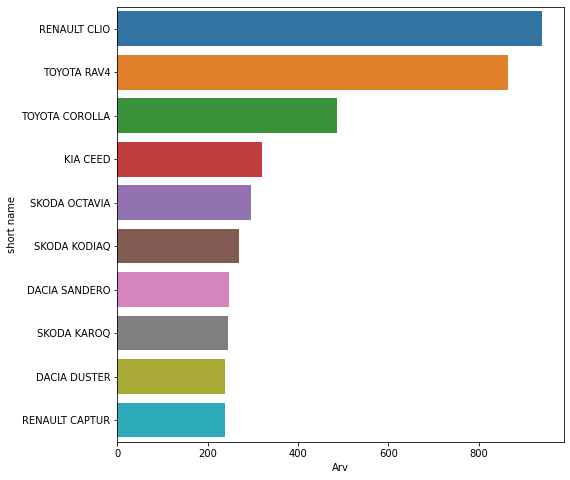

In [13]:
df_petrol = df[df['Mootori tüüp'].isin(['BENSIIN_KATALYSAATOR', 'BENSIIN'])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


         short name  Arv
1       TOYOTA RAV4  536
2    TOYOTA COROLLA  491
3       TOYOTA C-HR  211
4      TOYOTA CAMRY  176
5        HONDA CR-V  115
6   SUBARU FORESTER   77
7           MAZDA 3   76
8        VOLVO XC60   63
9     SKODA OCTAVIA   51
10       VOLVO XC90   50


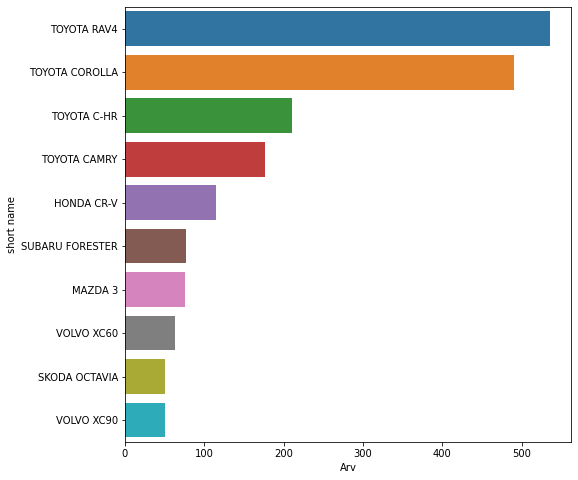

In [14]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'HYBRIID' in x)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

         short name  Arv
1      HYUNDAI KONA   58
2       NISSAN LEAF   56
3       RENAULT ZOE   33
4    PORSCHE TAYCAN   32
5     TESLA MODEL 3   20
6    VOLKSWAGEN UP!   18
7           HONDA E   17
8   VOLKSWAGEN ID.3   15
9       PEUGEOT 208   15
10     SKODA CITIGO   14


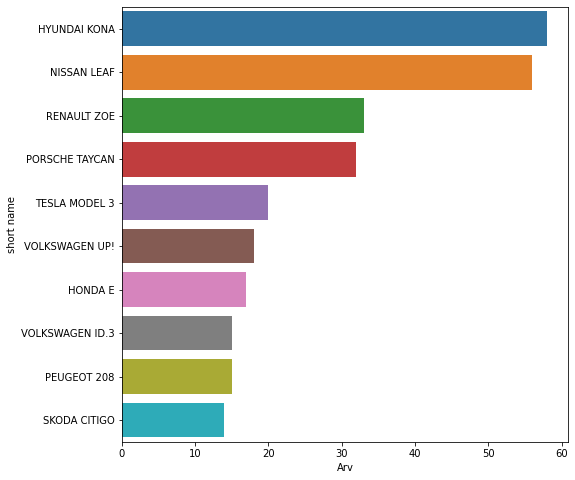

In [15]:
df_electric = df[df['Mootori tüüp'] == 'ELEKTER']

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

           short name  Arv
1         TOYOTA RAV4  694
2       SKODA OCTAVIA  598
3      TOYOTA COROLLA  458
4        SKODA KODIAQ  330
5         SKODA KAMIQ  242
6        KIA SPORTAGE  202
7   VOLKSWAGEN TIGUAN  195
8         TOYOTA C-HR  191
9            KIA CEED  184
10        SKODA KAROQ  170


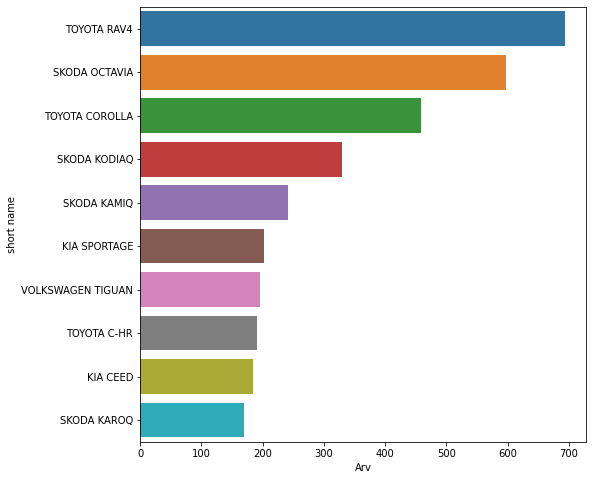

In [16]:
df_private = df[df[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER in x)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

          short name  Arv
1       RENAULT CLIO  906
2        TOYOTA RAV4  706
3   CITROEN BERLINGO  533
4     TOYOTA COROLLA  519
5      SKODA OCTAVIA  456
6     RENAULT CAPTUR  272
7       PEUGEOT 3008  250
8     RENAULT MEGANE  231
9           KIA CEED  219
10           AUDI Q3  216


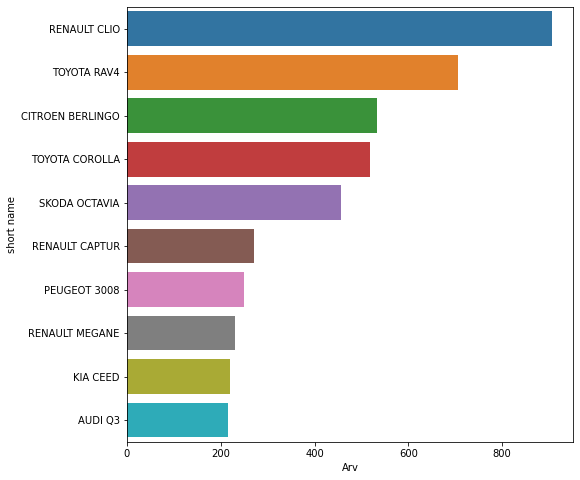

In [17]:
df_corporate = df[df[COLUMN_CUSTOMER].apply(lambda x: PRIVATE_CUSTOMER not in x)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  10427
SUV       True   8857


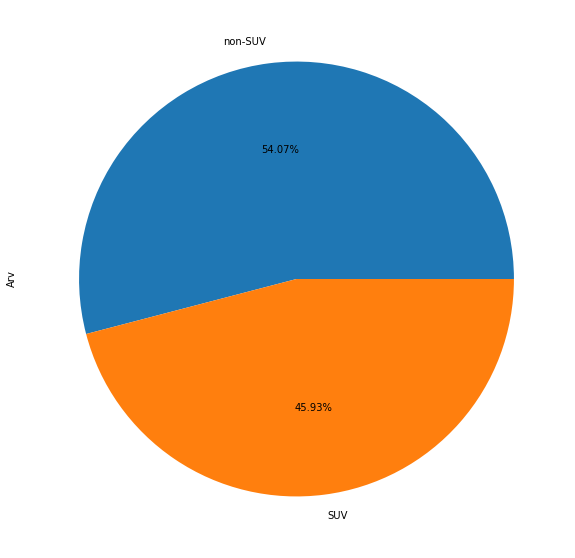

In [18]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  5092
DIISEL                2154
BENSIIN_HYBRIID       1232
DIISEL_HYBRIID         162
CNG                    111
ELEKTER                 96
BENSIIN                 10


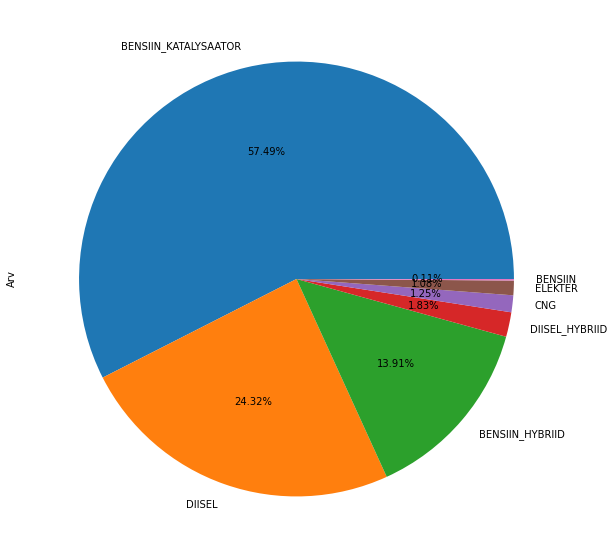

In [19]:
df_suv = df[df['SUV']]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

           short name   Arv
1         TOYOTA RAV4  1400
2        SKODA KODIAQ   536
3        KIA SPORTAGE   399
4        DACIA DUSTER   327
5      RENAULT CAPTUR   322
6         TOYOTA C-HR   321
7         SKODA KAMIQ   314
8         SKODA KAROQ   291
9        PEUGEOT 3008   289
10  VOLKSWAGEN TIGUAN   288


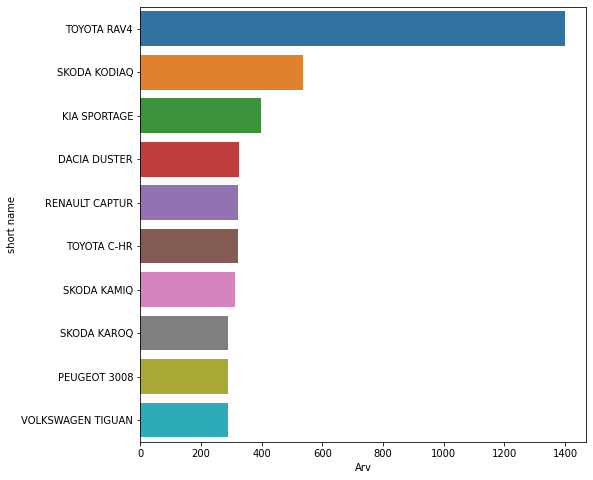

In [20]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

             short name  Arv
1          SKODA KODIAQ  266
2          PEUGEOT 3008  250
3          PEUGEOT 2008  182
4               AUDI Q3  172
5          KIA SPORTAGE  166
6          PEUGEOT 5008  153
7   CITROEN C5 AIRCROSS  125
8        RENAULT KADJAR  120
9     VOLKSWAGEN TIGUAN  117
10         DACIA DUSTER   88


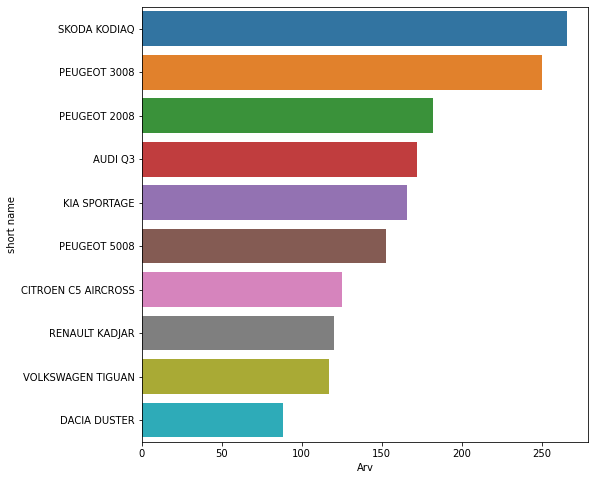

In [21]:
df_diesel_suv = df_diesel[df_diesel['SUV']]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

        short name  Arv
1      TOYOTA RAV4  864
2     SKODA KODIAQ  270
3      SKODA KAROQ  245
4   RENAULT CAPTUR  239
5     DACIA DUSTER  239
6     KIA SPORTAGE  231
7   RENAULT MEGANE  213
8   HYUNDAI TUCSON  209
9      SKODA KAMIQ  209
10  NISSAN QASHQAI  196


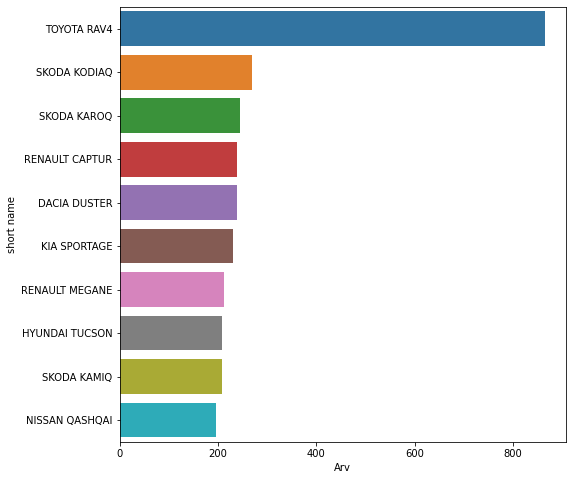

In [22]:
df_petrol_suv = df_petrol[df_petrol['SUV']]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

         short name  Arv
1       TOYOTA RAV4  536
2       TOYOTA C-HR  211
3        HONDA CR-V  115
4   SUBARU FORESTER   77
5        VOLVO XC60   63
6        VOLVO XC90   50
7           AUDI Q8   45
8          LEXUS RX   41
9           AUDI Q7   40
10      MAZDA CX-30   40


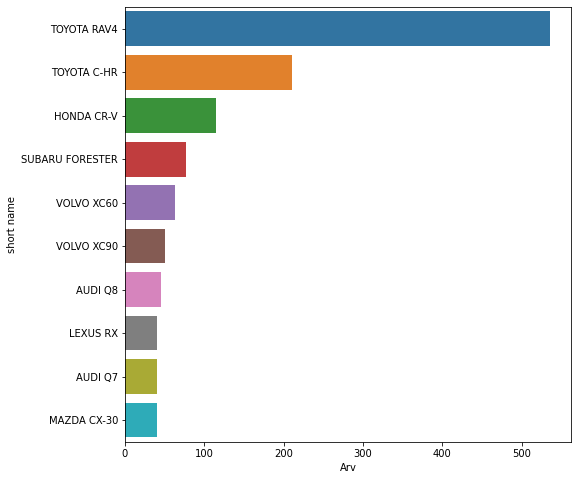

In [23]:
df_hybrid_suv = df_hybrids[df_hybrids['SUV']]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [24]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False)


Haapsalu
    short name  Arv
1  TOYOTA RAV4   16
2  TOYOTA C-HR    7
3     KIA CEED    7

Keila
      short name  Arv
1  SKODA OCTAVIA    7
2    TOYOTA RAV4    6
3       KIA CEED    6

Kohtla-Järve
      short name  Arv
1    TOYOTA RAV4   16
2  SKODA OCTAVIA   11
3   KIA SPORTAGE   10

Loksa
      short name  Arv
1  SKODA OCTAVIA    3
2  SUZUKI VITARA    2
3        AUDI Q5    1

Maardu
      short name  Arv
1    TOYOTA RAV4   16
2  SKODA OCTAVIA   11
3   PEUGEOT 2008    5

Määramata
         short name  Arv
1      RENAULT CLIO  876
2       TOYOTA RAV4  601
3  CITROEN BERLINGO  531

Narva
      short name  Arv
1    TOYOTA RAV4   22
2   KIA SPORTAGE   21
3  SKODA OCTAVIA   15

Narva-Jõesuu
       short name  Arv
1  TOYOTA COROLLA    7
2     TOYOTA RAV4    6
3     TOYOTA C-HR    4

Paide
       short name  Arv
1  TOYOTA COROLLA    9
2     TOYOTA RAV4    8
3   SKODA OCTAVIA    4

Pärnu
       short name  Arv
1   SKODA OCTAVIA   38
2      HONDA CR-V   30
3  TOYOTA COROLLA   27

Rakvere
   

# Top 3 for each mark

In [25]:
df_group = group_and_sort(df, ['Mark'])
marks = df_group.head(20)['Mark'].tolist()
df_group.set_index('Mark', inplace=True)

for mark in marks:
    models = df[df['Mark'] == mark]
    count = df_group.loc[mark, 'Arv']
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

TOYOTA total: 3362
Top 3 TOYOTA models
       short name   Arv
1     TOYOTA RAV4  1400
2  TOYOTA COROLLA   977
3     TOYOTA C-HR   321

SKODA total: 2884
Top 3 SKODA models
      short name   Arv
1  SKODA OCTAVIA  1054
2   SKODA KODIAQ   536
3   SKODA SUPERB   336

RENAULT total: 2021
Top 3 RENAULT models
       short name  Arv
1    RENAULT CLIO  956
2  RENAULT CAPTUR  322
3  RENAULT MEGANE  275

KIA total: 1259
Top 3 KIA models
     short name  Arv
1      KIA CEED  403
2  KIA SPORTAGE  399
3   KIA PROCEED   92

VOLKSWAGEN total: 1197
Top 3 VOLKSWAGEN models
          short name  Arv
1  VOLKSWAGEN TIGUAN  288
2  VOLKSWAGEN PASSAT  275
3    VOLKSWAGEN GOLF  201

PEUGEOT total: 1173
Top 3 PEUGEOT models
     short name  Arv
1  PEUGEOT 3008  289
2  PEUGEOT 2008  267
3   PEUGEOT 308  218

CITROEN total: 1161
Top 3 CITROEN models
            short name  Arv
1     CITROEN BERLINGO  601
2           CITROEN C3  216
3  CITROEN C3 AIRCROSS  135

DACIA total: 706
Top 3 DACIA models
      short na